# Neural Networks in PyTorch

In [1]:
# Critical to avoid kernel dying from imshow()
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [60]:
# Import things like usual

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper_1

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [61]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5), (0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [62]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

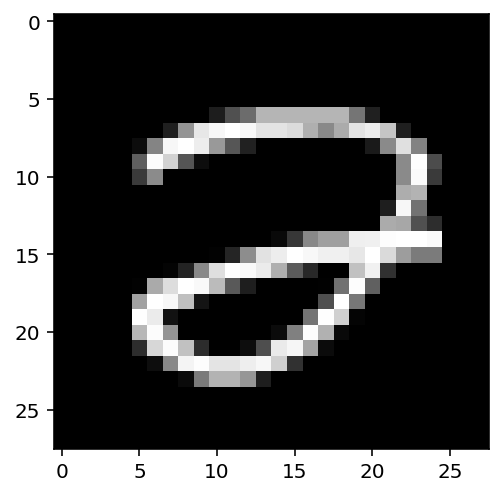

In [63]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [64]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [65]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [66]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0006, -0.0127, -0.0279,  ..., -0.0349,  0.0244, -0.0062],
        [ 0.0023,  0.0339, -0.0276,  ...,  0.0151, -0.0262, -0.0085],
        [-0.0085, -0.0032,  0.0178,  ..., -0.0190,  0.0305, -0.0322],
        ...,
        [-0.0085,  0.0156, -0.0063,  ...,  0.0092,  0.0283, -0.0194],
        [ 0.0354, -0.0252, -0.0004,  ...,  0.0257,  0.0003, -0.0272],
        [-0.0068, -0.0075, -0.0160,  ...,  0.0146, -0.0103, -0.0230]],
       requires_grad=True)
Parameter containing:
tensor([-0.0205,  0.0083,  0.0208, -0.0295,  0.0146, -0.0069,  0.0319,  0.0029,
         0.0305, -0.0170,  0.0004,  0.0006,  0.0341,  0.0352,  0.0321,  0.0356,
        -0.0292,  0.0079, -0.0322, -0.0234, -0.0152,  0.0016, -0.0177, -0.0260,
        -0.0330, -0.0046,  0.0165,  0.0275, -0.0070,  0.0047, -0.0295,  0.0192,
        -0.0035,  0.0039, -0.0302,  0.0044,  0.0277,  0.0323,  0.0179,  0.0151,
         0.0244, -0.0081, -0.0020,  0.0137,  0.0138,  0.0016, -0.0159, -0.0317,
         0.0100

In [67]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0133,  0.0102, -0.0051,  ...,  0.0009, -0.0085,  0.0015],
        [ 0.0124, -0.0019, -0.0013,  ..., -0.0152, -0.0063,  0.0162],
        [-0.0039, -0.0085,  0.0033,  ...,  0.0070, -0.0008, -0.0042],
        ...,
        [-0.0076, -0.0133,  0.0067,  ...,  0.0014,  0.0218,  0.0043],
        [ 0.0086,  0.0181, -0.0036,  ...,  0.0054, -0.0147, -0.0004],
        [ 0.0009, -0.0048, -0.0040,  ...,  0.0033,  0.0020, -0.0103]])

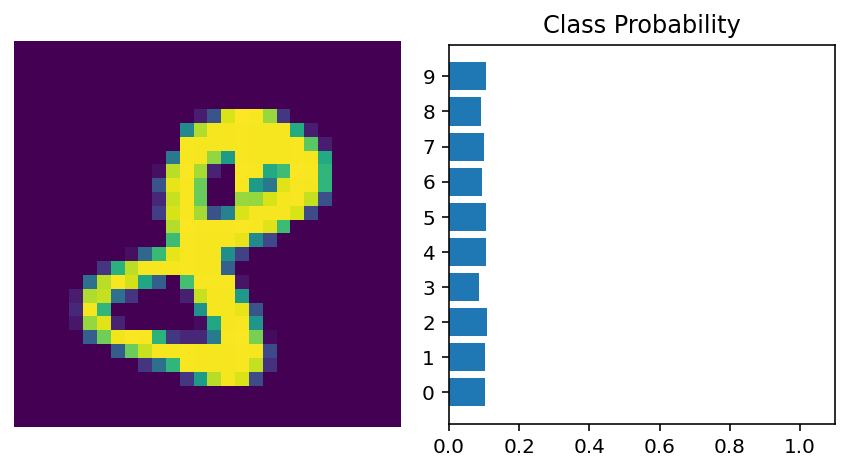

In [69]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to not automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper_1.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


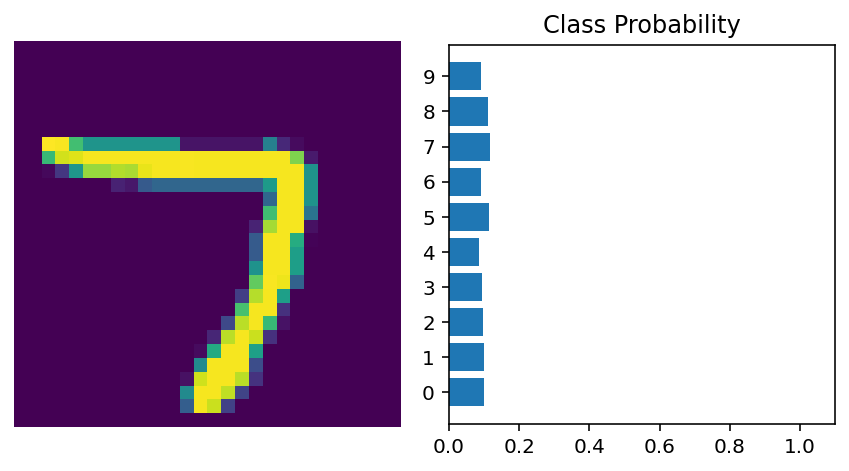

In [70]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper_1.view_classify(images[0].view(1, 28, 28), ps)

In [71]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

# Training Networks

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [73]:
print('Initial weights - ', model.fc1.weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model.fc1.weight.grad)
optimizer.step()
print('Updated weights - ', model.fc1.weight)

Initial weights -  Parameter containing:
tensor([[ 0.0287,  0.0170, -0.0252,  ..., -0.0295, -0.0043, -0.0148],
        [ 0.0092, -0.0248,  0.0289,  ...,  0.0109, -0.0191, -0.0049],
        [ 0.0295,  0.0333, -0.0349,  ..., -0.0229, -0.0118, -0.0282],
        ...,
        [ 0.0337,  0.0238,  0.0165,  ..., -0.0270,  0.0177, -0.0252],
        [ 0.0199, -0.0249,  0.0114,  ...,  0.0356,  0.0109, -0.0263],
        [-0.0156, -0.0165, -0.0096,  ..., -0.0162,  0.0090, -0.0286]],
       requires_grad=True)
Gradient - tensor([[ 2.1980e-05,  2.1980e-05,  2.1980e-05,  ...,  2.1980e-05,
          2.1980e-05,  2.1980e-05],
        [-9.4162e-05, -9.4162e-05, -9.4162e-05,  ..., -9.4162e-05,
         -9.4162e-05, -9.4162e-05],
        [ 1.5725e-04,  1.5725e-04,  1.5725e-04,  ...,  1.5725e-04,
          1.5725e-04,  1.5725e-04],
        ...,
        [ 1.4154e-04,  1.4154e-04,  1.4154e-04,  ...,  1.4154e-04,
          1.4154e-04,  1.4154e-04],
        [ 2.1700e-04,  2.1700e-04,  2.1700e-04,  ...,  2.1700e

In [74]:
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [77]:
epochs = 10
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/10...  Loss: 2.2600
Epoch: 1/10...  Loss: 2.2541
Epoch: 1/10...  Loss: 2.2508
Epoch: 1/10...  Loss: 2.2482
Epoch: 1/10...  Loss: 2.2480
Epoch: 1/10...  Loss: 2.2451
Epoch: 1/10...  Loss: 2.2396
Epoch: 1/10...  Loss: 2.2360
Epoch: 1/10...  Loss: 2.2387
Epoch: 1/10...  Loss: 2.2397
Epoch: 1/10...  Loss: 2.2347
Epoch: 1/10...  Loss: 2.2333
Epoch: 1/10...  Loss: 2.2272
Epoch: 1/10...  Loss: 2.2286
Epoch: 1/10...  Loss: 2.2225
Epoch: 1/10...  Loss: 2.2278
Epoch: 1/10...  Loss: 2.2205
Epoch: 1/10...  Loss: 2.2213
Epoch: 1/10...  Loss: 2.2134
Epoch: 1/10...  Loss: 2.2074
Epoch: 1/10...  Loss: 2.2159
Epoch: 1/10...  Loss: 2.2149
Epoch: 1/10...  Loss: 2.2106
Epoch: 2/10...  Loss: 1.2122
Epoch: 2/10...  Loss: 2.1990
Epoch: 2/10...  Loss: 2.1940
Epoch: 2/10...  Loss: 2.1995
Epoch: 2/10...  Loss: 2.1879
Epoch: 2/10...  Loss: 2.1865
Epoch: 2/10...  Loss: 2.1961
Epoch: 2/10...  Loss: 2.1819
Epoch: 2/10...  Loss: 2.1807
Epoch: 2/10...  Loss: 2.1752
Epoch: 2/10...  Loss: 2.1770
Epoch: 2/10...

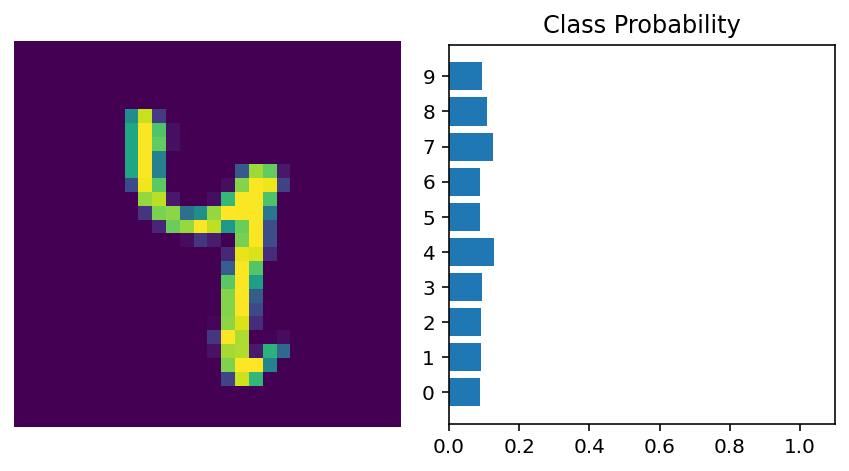

In [90]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
helper_1.view_classify(img.view(1, 28, 28), ps)

# Fashion-MNIST Exercise

In [2]:
import torch
from torchvision import datasets, transforms
import helper_1

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

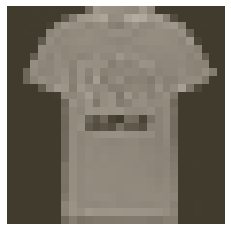

In [3]:
image, label = next(iter(trainloader))
helper_1.imshow(image[0,:]);

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms


In [20]:
# Defining the Model

# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

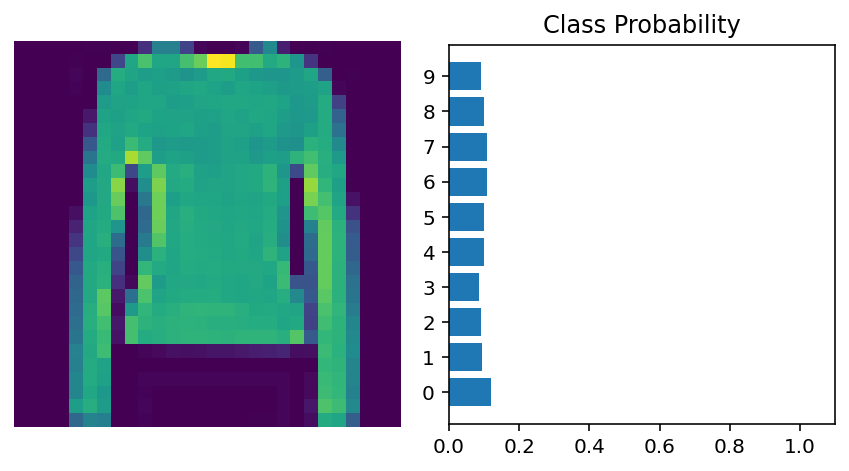

In [6]:
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper_1.view_classify(images[0].view(1, 28, 28), ps)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [22]:
epochs = 10
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/10...  Loss: 2.3026
Epoch: 1/10...  Loss: 2.3025
Epoch: 1/10...  Loss: 2.3017
Epoch: 1/10...  Loss: 2.3010
Epoch: 1/10...  Loss: 2.3000
Epoch: 1/10...  Loss: 2.2998
Epoch: 1/10...  Loss: 2.2994
Epoch: 1/10...  Loss: 2.2984
Epoch: 1/10...  Loss: 2.2984
Epoch: 1/10...  Loss: 2.2976
Epoch: 1/10...  Loss: 2.2967
Epoch: 1/10...  Loss: 2.2965
Epoch: 1/10...  Loss: 2.2955
Epoch: 1/10...  Loss: 2.2955
Epoch: 1/10...  Loss: 2.2943
Epoch: 1/10...  Loss: 2.2934
Epoch: 1/10...  Loss: 2.2925
Epoch: 1/10...  Loss: 2.2920
Epoch: 1/10...  Loss: 2.2912
Epoch: 1/10...  Loss: 2.2899
Epoch: 1/10...  Loss: 2.2892
Epoch: 1/10...  Loss: 2.2888
Epoch: 1/10...  Loss: 2.2874
Epoch: 2/10...  Loss: 1.2582
Epoch: 2/10...  Loss: 2.2859
Epoch: 2/10...  Loss: 2.2840
Epoch: 2/10...  Loss: 2.2822
Epoch: 2/10...  Loss: 2.2816
Epoch: 2/10...  Loss: 2.2780
Epoch: 2/10...  Loss: 2.2759
Epoch: 2/10...  Loss: 2.2734
Epoch: 2/10...  Loss: 2.2712
Epoch: 2/10...  Loss: 2.2703
Epoch: 2/10...  Loss: 2.2651
Epoch: 2/10...

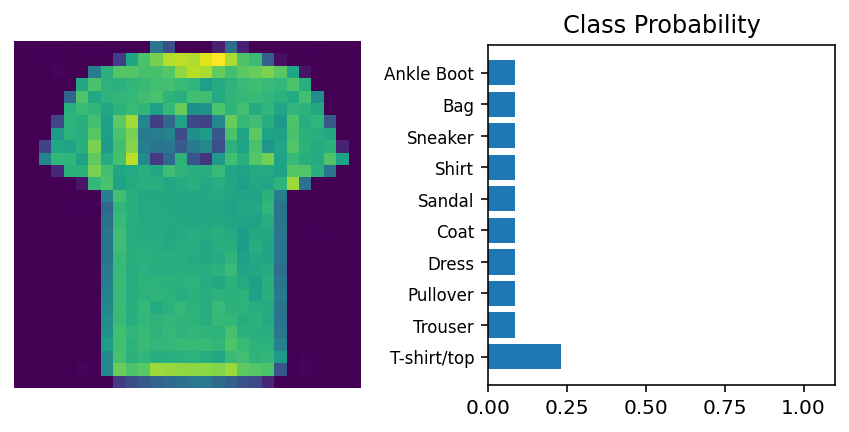

In [44]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper_1.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')